<a href="https://colab.research.google.com/github/Sukhdeep2006/Learning-TensorFlow/blob/main/003_TF_ImageClassification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Sukhdeep2006/Learning-TensorFlow/blob/main/003_TF_ImageClassification_with_CNN.ipynb#scrollTo=FWcePnJK2udV)

# Convolutional Neural Network is the back bone of deep learning for solving computer vision problems. We will use the CNNs for the image classification in the Fashion-MNIST dataset available from Tensor flow.


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras.layers as ll
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised = True, with_info = True)
print(dataset.keys())

test_dataset = dataset['test']
train_dataset = dataset['train']
num_test_examples = metadata.splits['test'].num_examples
num_train_examples = metadata.splits['train'].num_examples

print(num_test_examples,num_train_examples )


dict_keys(['test', 'train'])
10000 60000


In [3]:
def normalize(images, labels):
  """converts the image pixels range from 0-255 to 0-1 range"""
  images = tf.cast(images,tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Lets also define an array of the labels we need to classify.

In [4]:
class_names = ['T-Shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

### Lets randomly choose 25 imgaes from the training dataset and take a look 

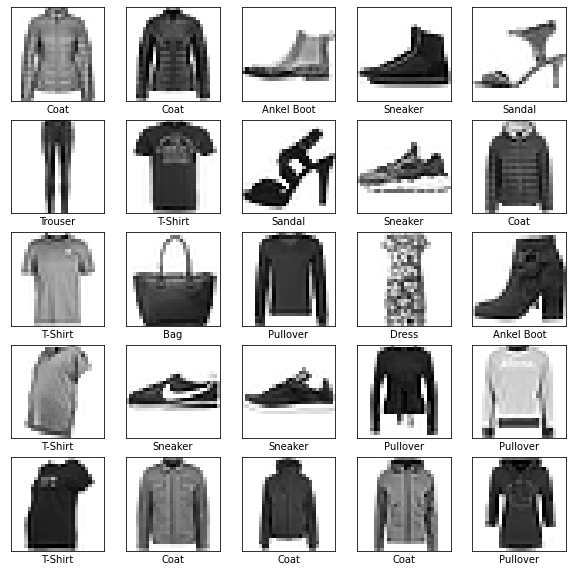

In [5]:
plt.figure(figsize = (10,10))
i =0
for image, label in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1

plt.show()

In [6]:
model = tf.keras.Sequential([
                 ll.Conv2D(32, (3,3), padding = 'same', activation=tf.nn.relu, input_shape =(28,28,1)),
                 ll.MaxPooling2D((2,2) , strides = 2),
                 #ll.Conv2D(64, (3,3), padding = 'same', activation= tf.nn.relu),
                 #ll.MaxPooling2D((2,2), strides = 2 ),      
                 ll.Flatten(),
                 ll.Dense(64, activation = tf.nn.relu),
                 ll.Dense(10, activation=tf.nn.softmax)     
])

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
#history = model.fit(train_dataset,spochs= 5, batch_size= BATCH_SIZE)
#history = model.fit(train_dataset,epochs= 10, steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))
history = model.fit(train_dataset,epochs= 5, steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1625 - accuracy: 0.9410
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1474 - accuracy: 0.9462
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1289 - accuracy: 0.9525
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1169 - accuracy: 0.9581
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1021 - accuracy: 0.9635


### We have now trained our model.We will try to evaluate the accuracy of the model.

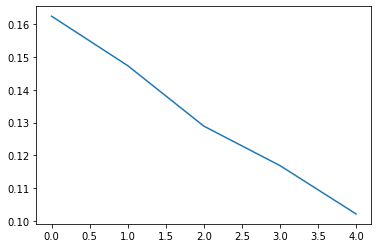

In [14]:
plt.plot(history.history['loss'])

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset , steps = math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.9113


### As we see the model acheived a very high level of accuracy on the trainign data at a level on ~98%, but it fails to generalise on the test data where the accuracy drops down to ~92%.

This is because we training the model for 10 epochs whihc are equivalent to 600K training examples and the use of convulutions makes the model strong enough to overfit the data.

Lets take a look at how well our model is able to predict the labels for randmly chosen 32 images in a sigle batch from the test dataset.

In [16]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  print(test_images.shape, test_labels.shape, predictions.shape)

(32, 28, 28, 1) (32,) (32, 10)


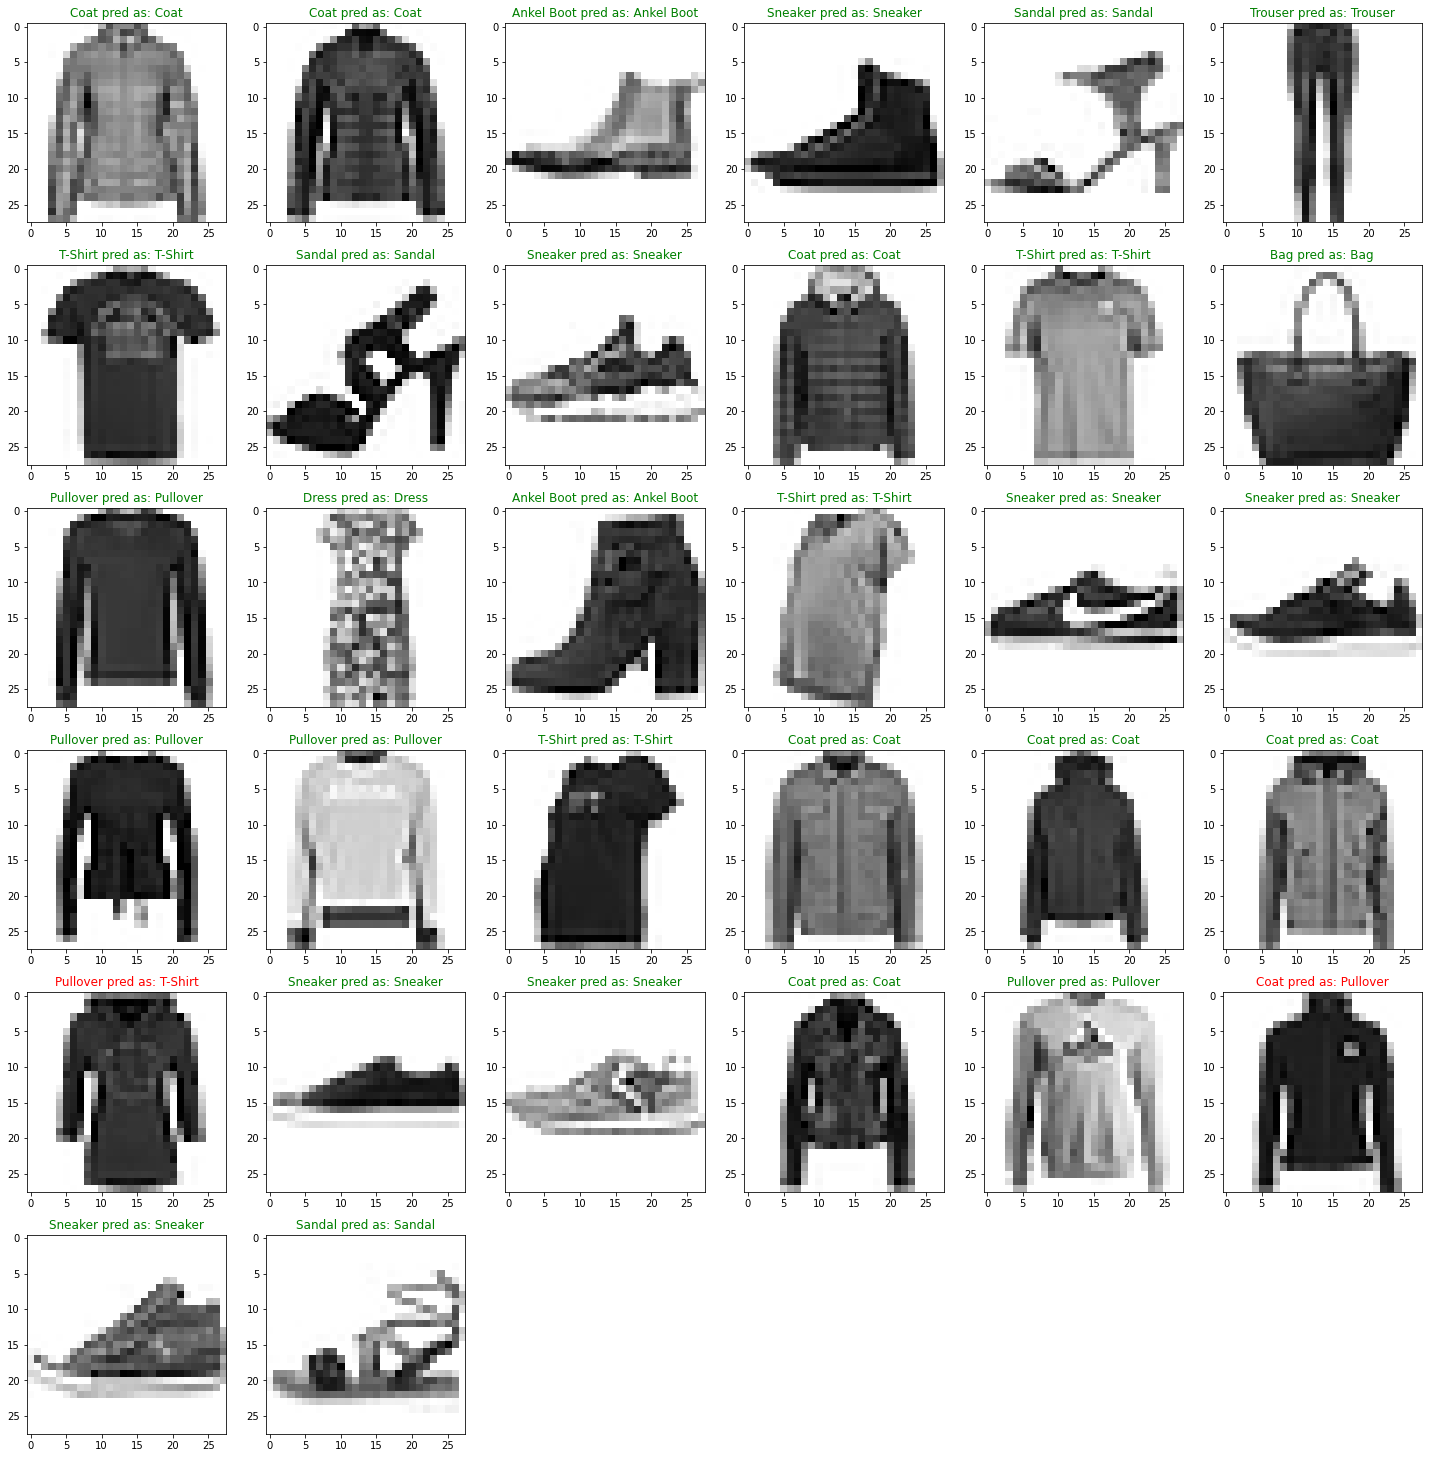

In [17]:
plt.figure(figsize=(25,26))
for i in range(32):
  test_img = test_images[i].reshape((28,28))
  test_label = class_names[test_labels[i]]
  prediction = class_names[np.argmax(predictions[i])]
  #print(test_label, prediction)
  plt.subplot(6,6,i+1)
  plt.imshow(test_img, cmap = plt.cm.binary)
  if test_label == prediction:
    clr = 'green'
  else:
    clr = 'red'
  plt.title(test_label + ' pred as: '+ prediction, color = clr)